<a href="https://colab.research.google.com/github/tiararr/project/blob/main/Final_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This project is based on a fictitious database that is used for the purpose of finding out which countries are entitled to assistance based on k-means grouping using data on the number of child deaths, export values, health figures, import values, population income, inflation, life expectancy, fertility rates, and GDP per capita. 
As a result, there are 86 countries that are included in label 0 (where all variables are lower than other countries) and 10 countries that must be assisted by considering aspects of health, GDP per capita, and life expectancy. These are Iraq, Yemen, Turkmenistan, Mautitania, Nepal, Kazakhstan, Kyrgysz Republic, Uzbekistan, Philippines, and Azerbaijan.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/Bootcamp/Data_Negara_HELP.csv', na_values=['na','-'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Negara            167 non-null    object 
 1   Kematian_anak     167 non-null    float64
 2   Ekspor            167 non-null    float64
 3   Kesehatan         167 non-null    float64
 4   Impor             167 non-null    float64
 5   Pendapatan        167 non-null    int64  
 6   Inflasi           167 non-null    float64
 7   Harapan_hidup     167 non-null    float64
 8   Jumlah_fertiliti  167 non-null    float64
 9   GDPperkapita      167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [ ]:
df

,Negara,Kematian_anak,Ekspor,Kesehatan,Impor,Pendapatan,Inflasi,Harapan_hidup,Jumlah_fertiliti,GDPperkapita
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200
...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970
163,Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500
164,Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310
165,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310


In [ ]:
#mengetahui adanya missing value
df.isnull().sum()

Negara              0
Kematian_anak       0
Ekspor              0
Kesehatan           0
Impor               0
Pendapatan          0
Inflasi             0
Harapan_hidup       0
Jumlah_fertiliti    0
GDPperkapita        0
dtype: int64

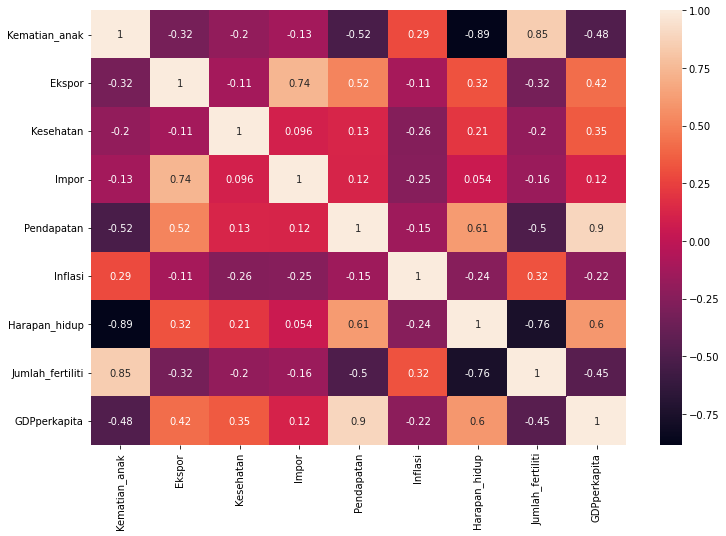

In [ ]:
#karena tidak terdapat missing value, maka tidak dilakukan handling missing value
#memvisualisasikan hubungan multivariate
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), annot=True, fmt='.2g')

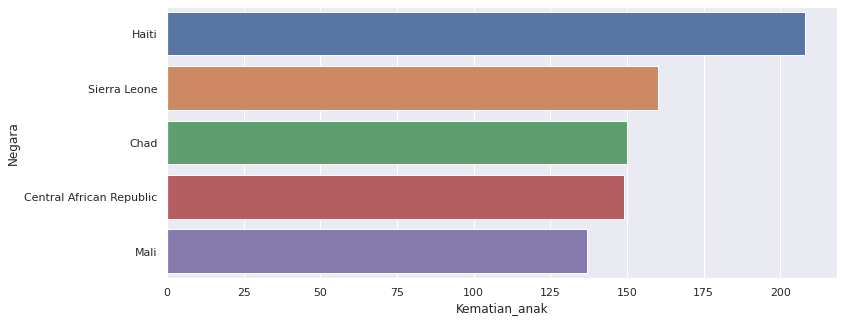

In [ ]:
#memvisualisasikan 5 negara dengan kematian anak tertinggi
#mengatur supaya divisualisasikan dari yang tertinggi ke terendah
df_die=df.sort_values(['Kematian_anak'], ascending=False).reset_index(drop=True)
df_die=df_die.head(5)

sns.set(style='darkgrid')
plt.figure(figsize=(12,5))
sns.barplot(x='Kematian_anak',y='Negara', data=df_die, estimator=sum)

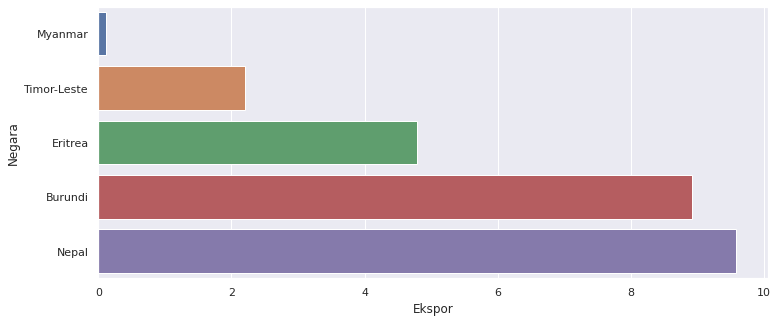

In [ ]:
#memvisualisasikan 5 negara dengan ekspor terendah
#mengatur supaya divisualisasikan dari yang terendah ke tertinggi
df_eks=df.sort_values(['Ekspor'], ascending=True).reset_index(drop=True)
df_eks=df_eks.head(5)

sns.set(style='darkgrid')
plt.figure(figsize=(12,5))
sns.barplot(x='Ekspor',y='Negara', data=df_eks, estimator=sum)

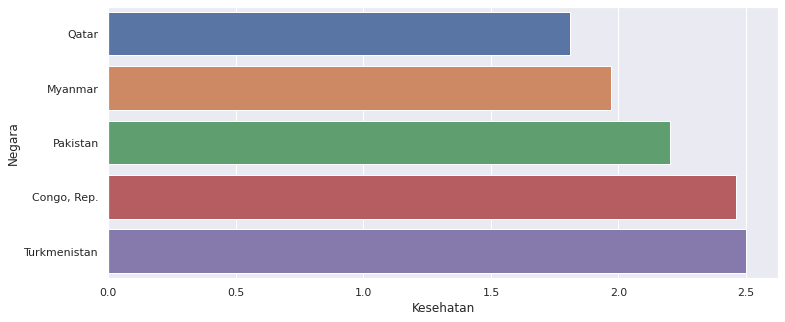

In [ ]:
#memvisualisasikan 5 negara dengan kesehatan terendah
#mengatur supaya divisualisasikan dari yang terendah ke tertinggi
df_health=df.sort_values(['Kesehatan'], ascending=True).reset_index(drop=True)
df_health=df_health.head(5)

sns.set(style='darkgrid')
plt.figure(figsize=(12,5))
sns.barplot(x='Kesehatan',y='Negara', data=df_health, estimator=sum)

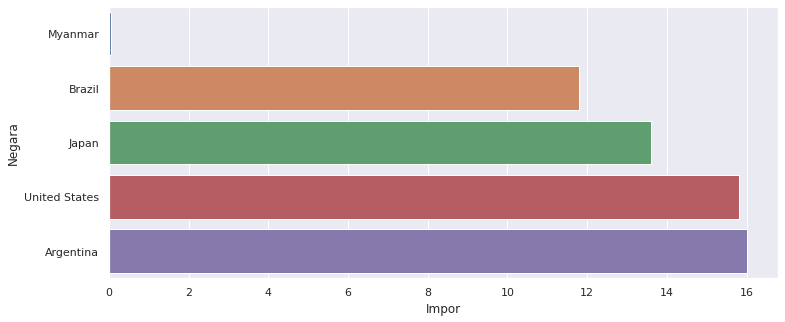

In [ ]:
#memvisualisasikan 5 negara dengan impor terendah
#mengatur supaya divisualisasikan dari yang terendah ke tertinggi
df_import=df.sort_values(['Impor'], ascending=True).reset_index(drop=True)
df_import=df_import.head(5)

sns.set(style='darkgrid')
plt.figure(figsize=(12,5))
sns.barplot(x='Impor',y='Negara', data=df_import, estimator=sum)

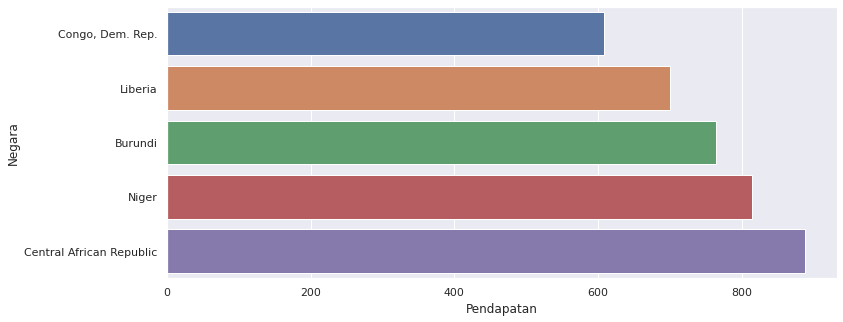

In [ ]:
#memvisualisasikan 5 negara dengan pendapatan terendah
#mengatur supaya divisualisasikan dari yang terendah ke tertinggi
df_pend=df.sort_values(['Pendapatan'], ascending=True).reset_index(drop=True)
df_pend=df_pend.head(5)

sns.set(style='darkgrid')
plt.figure(figsize=(12,5))
sns.barplot(x='Pendapatan',y='Negara', data=df_pend, estimator=sum)

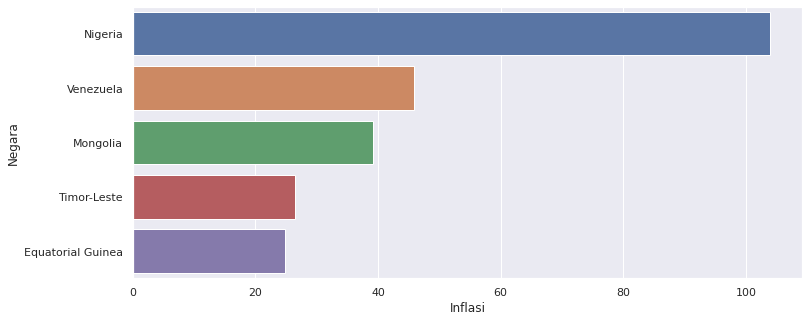

In [ ]:
#memvisualisasikan 5 negara dengan inflasi tertinggi
#mengatur supaya divisualisasikan dari yang tertinggi ke terendah
df_inf=df.sort_values(['Inflasi'], ascending=False).reset_index(drop=True)
df_inf=df_inf.head(5)

sns.set(style='darkgrid')
plt.figure(figsize=(12,5))
sns.barplot(x='Inflasi',y='Negara', data=df_inf, estimator=sum)

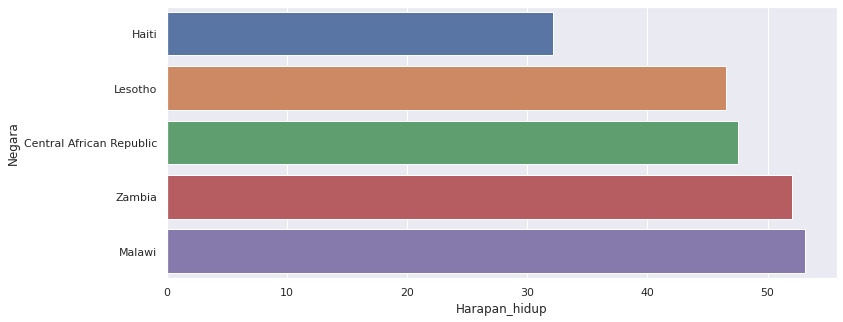

In [ ]:
#memvisualisasikan 5 negara dengan harapan hidup terendah
#mengatur supaya divisualisasikan dari yang terendah ke tinggi
df_exp=df.sort_values(['Harapan_hidup'], ascending=True).reset_index(drop=True)
df_exp=df_exp.head(5)

sns.set(style='darkgrid')
plt.figure(figsize=(12,5))
sns.barplot(x='Harapan_hidup',y='Negara', data=df_exp, estimator=sum)

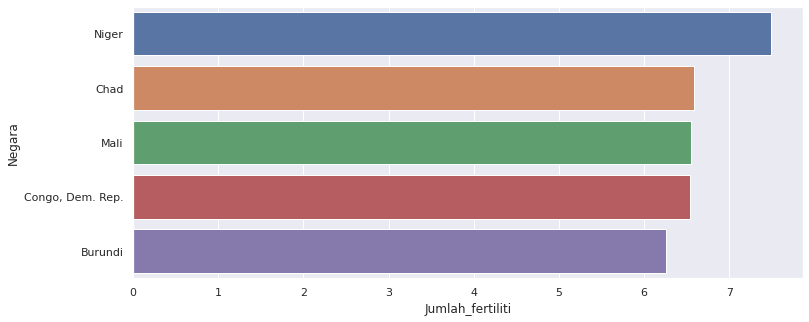

In [ ]:
#memvisualisasikan 5 negara dengan fertiity tertinggi
#mengatur supaya divisualisasikan dari yang tertinggi ke terendah
df_fertil=df.sort_values(['Jumlah_fertiliti'], ascending=False).reset_index(drop=True)
df_fertil=df_fertil.head(5)

sns.set(style='darkgrid')
plt.figure(figsize=(12,5))
sns.barplot(x='Jumlah_fertiliti',y='Negara', data=df_fertil, estimator=sum)

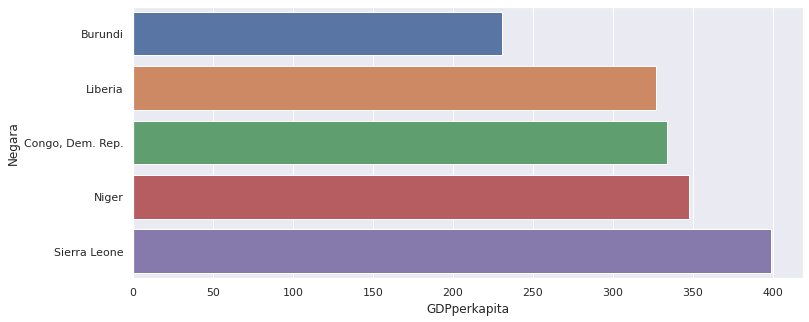

In [ ]:
#memvisualisasikan 5 negara dengan gdp terendah
#mengatur supaya divisualisasikan dari yang terendah ke tertinggi
df_gdp=df.sort_values(['GDPperkapita'], ascending=True).reset_index(drop=True)
df_gdp=df_gdp.head(5)

sns.set(style='darkgrid')
plt.figure(figsize=(12,5))
sns.barplot(x='GDPperkapita',y='Negara', data=df_gdp, estimator=sum)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


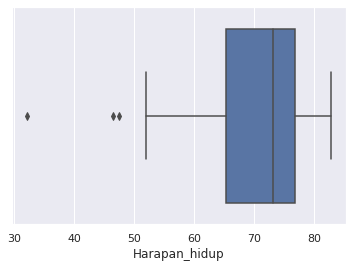

In [ ]:
#melihat outlier harapan hidup
sns.boxplot('Harapan_hidup', data=df)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


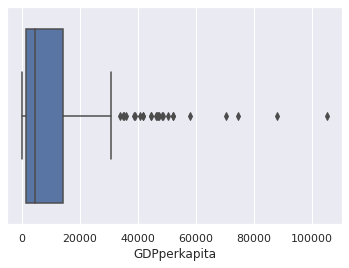

In [ ]:
#melihat outlier gdp
sns.boxplot('GDPperkapita', data=df)

In [ ]:
#membuat dataset dengan kolom harapan hidup dan gdp
df2=pd.DataFrame(df[['Harapan_hidup','GDPperkapita']])
df2

,Harapan_hidup,GDPperkapita
0,56.2,553
1,76.3,4090
2,76.5,4460
3,60.1,3530
4,76.8,12200
...,...,...
162,63.0,2970
163,75.4,13500
164,73.1,1310
165,67.5,1310


In [ ]:
#melakukan scaling data

from sklearn.preprocessing import StandardScaler

sc=StandardScaler()
df_sc=sc.fit_transform(df2)
df_sc

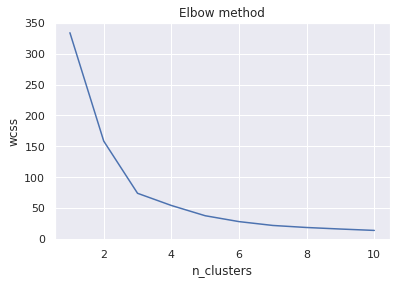

In [ ]:
#mencari nilai cluster optimal
from sklearn.cluster import KMeans

wcss = []
for i in range(1,11):
  kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
  kmeans.fit(df_sc)
  wcss.append(kmeans.inertia_)

plt.plot(range(1,11), wcss)
plt.title('Elbow method')
plt.xlabel('n_clusters')
plt.ylabel('wcss')

plt.show()

Text(0, 0.5, 'GDP per Kapita')

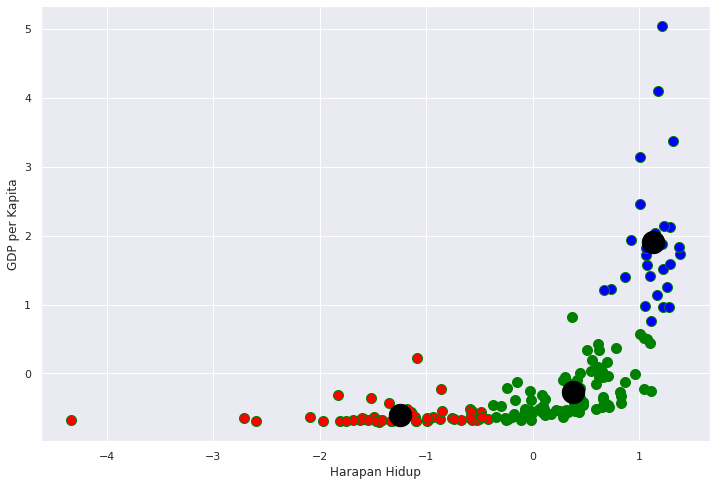

In [ ]:
#kmeans k=3
kmeans=KMeans(n_clusters=3, init='k-means++', random_state=42).fit(df_sc)
labels=kmeans.labels_

df_sc=pd.DataFrame(data=df_sc, columns=['Harapan_hidup','GDPperkapita'])
df_sc['label_kmeans']=labels

plt.figure(figsize=(12,8))

plt.scatter(df_sc.Harapan_hidup[df_sc.label_kmeans==0],
            df_sc['GDPperkapita'][df_sc.label_kmeans==0],
            c='red', s=100, edgecolor='green', linestyle='-')
plt.scatter(df_sc.Harapan_hidup[df_sc.label_kmeans==1],
            df_sc['GDPperkapita'][df_sc.label_kmeans==1],
            c='blue', s=100, edgecolor='green', linestyle='-')
plt.scatter(df_sc.Harapan_hidup[df_sc.label_kmeans==2],
            df_sc['GDPperkapita'][df_sc.label_kmeans==2],
            c='green', s=100, edgecolor='green', linestyle='-')

centers=kmeans.cluster_centers_
plt.scatter(centers[:,0], centers[:,1], c='black',s=500)
plt.xlabel('Harapan Hidup')
plt.ylabel('GDP per Kapita')

In [ ]:
#inverse transform
kmeans3=KMeans(n_clusters=3,init='k-means++',random_state=42)
kmeans3=kmeans3.fit(df_sc)
label3=kmeans3.labels_
label3

array([1, 0, 0, 1, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 2, 0, 1, 0, 0, 0, 1,
       0, 2, 0, 1, 1, 1, 1, 2, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 2, 0,
       2, 0, 0, 0, 0, 1, 1, 0, 1, 2, 2, 1, 1, 0, 2, 1, 2, 0, 0, 1, 1, 1,
       1, 0, 2, 1, 0, 0, 0, 2, 2, 2, 0, 2, 0, 0, 1, 1, 2, 0, 1, 0, 0, 1,
       1, 0, 0, 2, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0,
       2, 2, 1, 1, 2, 0, 1, 0, 0, 0, 0, 0, 0, 2, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 2, 0, 0, 1, 1, 0, 2, 0, 0, 1, 0, 2, 2, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 2, 2, 2, 0, 0, 1, 0, 0, 0, 1], dtype=int32)

In [ ]:
df3=df
df3['label_kmeans']=label3
df3=df3.loc[df3['label_kmeans']==0]
df3

,Negara,Kematian_anak,Ekspor,Kesehatan,Impor,Pendapatan,Inflasi,Harapan_hidup,Jumlah_fertiliti,GDPperkapita,label_kmeans
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,0
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,0
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,0
5,Argentina,14.5,18.9,8.10,16.0,18700,20.90,75.8,2.37,10300,0
6,Armenia,18.1,20.8,4.40,45.3,6700,7.77,73.3,1.69,3220,0
...,...,...,...,...,...,...,...,...,...,...,...
160,Uruguay,10.6,26.3,8.35,25.4,17100,4.91,76.4,2.08,11900,0
161,Uzbekistan,36.3,31.7,5.81,28.5,4240,16.50,68.8,2.34,1380,0
163,Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500,0
164,Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310,0


In [ ]:
#negara yang harus dibantu
negara=df3.sort_values(['Kesehatan'], ascending=True).sort_values(['GDPperkapita'],ascending=True).sort_values(['Harapan_hidup'],ascending=True).reset_index(drop=True)
negara[0:10]

,Negara,Kematian_anak,Ekspor,Kesehatan,Impor,Pendapatan,Inflasi,Harapan_hidup,Jumlah_fertiliti,GDPperkapita,label_kmeans
0,Iraq,36.9,39.40,8.41,34.1,12700,16.60,67.2,4.56,4500,0
1,Yemen,56.3,30.00,5.18,34.4,4480,23.60,67.5,4.67,1310,0
2,Turkmenistan,62.0,76.30,2.50,44.5,9940,2.31,67.9,2.83,4440,0
3,Mauritania,97.4,50.70,4.41,61.2,3320,18.90,68.2,4.98,1200,0
4,Nepal,47.0,9.58,5.25,36.4,1990,15.10,68.3,2.61,592,0
5,Kazakhstan,21.5,44.20,4.29,29.9,20100,19.50,68.4,2.60,9070,0
6,Kyrgyz Republic,29.6,51.60,6.18,81.7,2790,10.00,68.5,3.10,880,0
7,Uzbekistan,36.3,31.70,5.81,28.5,4240,16.50,68.8,2.34,1380,0
8,Philippines,31.9,34.80,3.61,36.6,5600,4.22,69.0,3.16,2130,0
9,Azerbaijan,39.2,54.30,5.88,20.7,16000,13.80,69.1,1.92,5840,0


In [ ]:
negara.describe()

,Kematian_anak,Ekspor,Kesehatan,Impor,Pendapatan,Inflasi,Harapan_hidup,Jumlah_fertiliti,GDPperkapita,label_kmeans
count,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.00000,86.000000,86.000000,86.0
mean,20.690698,42.547442,6.398256,48.094186,14251.162791,7.624267,73.87093,2.300814,7931.255814,0.0
std,16.068578,22.899436,2.054504,21.920988,9207.936783,7.782766,3.39279,0.914594,6217.105300,0.0
min,3.200000,2.200000,2.500000,11.800000,1850.000000,-4.210000,67.20000,1.230000,592.000000,0.0
25%,10.300000,27.825000,4.995000,33.075000,7430.000000,1.815000,71.30000,1.590000,3250.000000,0.0
50%,16.850000,37.650000,6.195000,47.250000,12700.000000,5.795000,74.15000,2.150000,5935.000000,0.0
75%,24.850000,52.275000,7.850000,60.675000,19000.000000,11.850000,76.37500,2.617500,11275.000000,0.0
max,97.400000,153.000000,11.700000,154.000000,45400.000000,45.900000,80.40000,6.230000,28000.000000,0.0
